In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import plotly.express as px

In [13]:
def add_cluster(df):
    # Define the lat_long_to_cluster dictionary
    lat_long_to_cluster = {
        (46.13, 10.18): 1, (46.13, 10.34): 1, (46.13, 10.5): 1, (46.13, 10.66): 1, (46.13, 10.82): 3, (46.13, 10.99): 3, (46.13, 11.15): 3, (46.13, 11.31): 3, (46.13, 11.47): 3, (46.13, 11.64): 3, (46.13, 11.8): 0, (46.13, 11.96): 0, (46.13, 12.12): 0, (46.13, 12.28): 0, (46.24, 10.18): 1, (46.24, 10.34): 1, (46.24, 10.5): 1, (46.24, 10.66): 1, (46.24, 10.82): 1, (46.24, 10.99): 3, (46.24, 11.15): 3, (46.24, 11.31): 3, (46.24, 11.47): 3, (46.24, 11.64): 3, (46.24, 11.8): 0, (46.24, 11.96): 0, (46.24, 12.12): 0, (46.24, 12.28): 0, (46.35, 10.18): 1, (46.35, 10.34): 1, (46.35, 10.5): 1, (46.35, 10.66): 1, (46.35, 10.82): 1, (46.35, 10.99): 3, (46.35, 11.15): 3, (46.35, 11.31): 3, (46.35, 11.47): 3, (46.35, 11.64): 0, (46.35, 11.8): 0, (46.35, 11.96): 0, (46.35, 12.12): 0, (46.35, 12.28): 0, (46.47, 10.18): 1, (46.47, 10.34): 1, (46.47, 10.5): 1, (46.47, 10.66): 1, (46.47, 10.82): 1, (46.47, 10.99): 3, (46.47, 11.15): 3, (46.47, 11.31): 3, (46.47, 11.47): 3, (46.47, 11.64): 0, (46.47, 11.8): 0, (46.47, 11.96): 0, (46.47, 12.12): 0, (46.47, 12.28): 0, (46.58, 10.18): 1, (46.58, 10.34): 1, (46.58, 10.5): 1, (46.58, 10.66): 1, (46.58, 10.82): 1, (46.58, 10.99): 3, (46.58, 11.15): 3, (46.58, 11.31): 3, (46.58, 11.47): 3, (46.58, 11.64): 0, (46.58, 11.8): 0, (46.58, 11.96): 0, (46.58, 12.12): 0, (46.58, 12.28): 0, (46.69, 10.18): 1, (46.69, 10.34): 1, (46.69, 10.5): 1, (46.69, 10.66): 1, (46.69, 10.82): 1, (46.69, 10.99): 2, (46.69, 11.15): 3, (46.69, 11.31): 2, (46.69, 11.47): 2, (46.69, 11.64): 0, (46.69, 12.12): 0, (46.69, 12.28): 0, (46.8, 10.18): 1, (46.8, 10.34): 1, (46.8, 10.5): 1, (46.8, 10.66): 1, (46.8, 10.82): 2, (46.8, 10.99): 2, (46.8, 11.15): 2, (46.8, 11.31): 2, (46.8, 11.47): 2, (46.8, 11.64): 0, (46.8, 12.12): 0, (46.8, 12.28): 0, (46.92, 10.18): 1, (46.92, 10.34): 1, (46.92, 10.5): 1, (46.92, 10.66): 1, (46.92, 10.82): 2, (46.92, 10.99): 2, (46.92, 11.15): 2, (46.92, 11.31): 2, (46.92, 11.47): 2, (46.92, 11.64): 2, (46.92, 12.12): 0, (46.92, 12.28): 0, (47.03, 10.18): 1, (47.03, 10.34): 1, (47.03, 10.5): 1, (47.03, 10.66): 2, (47.03, 10.82): 2, (47.03, 10.99): 2, (47.03, 11.15): 2, (47.03, 11.31): 2, (47.03, 11.47): 2, (47.03, 11.64): 2, (47.03, 12.12): 0, (47.03, 12.28): 0, (47.14, 10.18): 1, (47.14, 10.34): 1, (47.14, 10.5): 1, (47.14, 10.66): 2, (47.14, 10.82): 2, (47.14, 10.99): 2, (47.14, 11.15): 2, (47.14, 11.31): 2, (47.14, 11.47): 2, (47.14, 11.64): 2, (47.14, 11.8): 0, (47.14, 11.96): 0, (47.14, 12.12): 0, (47.14, 12.28): 0, (46.92, 11.96): 0, (46.69, 11.8): 0, (46.69, 11.96): 0, (46.8, 11.8): 0, (46.8, 11.96): 0, (46.92, 11.8): 0, (47.03, 11.8): 0, (47.03, 11.96): 0
        }

    # Function to map (latitude, longitude) pairs to cluster values
    def map_lat_long_to_cluster(row):
        lat_long_pair = (row['Latitude'], row['Longitude'])
        return lat_long_to_cluster.get(lat_long_pair, None)

    # Add the 'cluster' column to the DataFrame
    df['cluster'] = df.apply(lambda row: map_lat_long_to_cluster(row), axis=1)

    return df

In [24]:
def plot_clusters(df, column_to_plot):
    #bookmark

    # Plot clusters with larger scatter dots
    scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df[column_to_plot], cmap='viridis', marker='.', s=1000) # Adjust the 's' parameter to increase the size of dots

    shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
    shapefile_data = shapefile_data.cx[:, :46.0]
    shapefile_data.plot(ax=plt.gca(), alpha=0.5, color="black")
    # Add legend
    legend = plt.legend(*scatter.legend_elements(), title='Clusters',  bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Clustered Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.ylim(min(np.unique(df["Latitude"])-0.12), max(np.unique(df["Latitude"])+0.12))
    plt.savefig(f'./images/check2.png', dpi=300)
    plt.show()


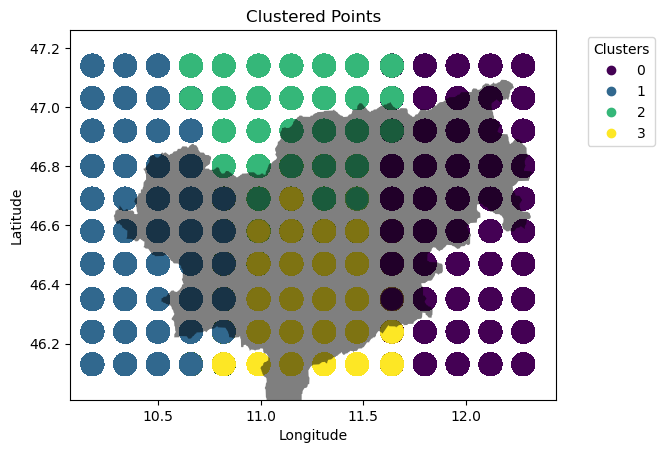

In [25]:
plot_clusters(df, "cluster")

In [21]:
plt.show()

In [ ]:
# def add_cluster(df):
#     bins = [-float('inf'), 10.83, 11.63, float('inf')]
#     labels = [0, 1, 2]

#     # Create a new column 'Cluster' based on the 'Longitude' values
#     df['Cluster'] = pd.cut(df['Longitude'], bins=bins, labels=labels, include_lowest=True)
#     return df

In [6]:
future_dictionary = {"": "Near Future (2021 - 2030)",
           "_mid_future": "Mid Future (2046-2055)",
            "_far_future": "Far Future (2091-2100)" }

In [ ]:


def plot_monthly_avg(future_type, cluster_name, plot_legend=True):
    monthly_avg_array = []
    scenario_array = ["rcp26", "rcp45", "rcp85"]

    df = pd.read_csv(f".\ig{future_type}_predictions.csv")
    df = add_cluster(df)
    df = cheat_in_the_scenarios(df)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    df = df[df['cluster'] == cluster_name]


    for scenario in scenario_array:
        # Calculate monthly average for each scenario
        monthly_avg = df.groupby('Month')[scenario].mean()
        monthly_avg_array.append(monthly_avg.values)

    # Plot all monthly averages on the same plot
    plt.figure(figsize=(10, 6))

    for monthly_avg_values in monthly_avg_array:
        plt.plot(range(1, 13), monthly_avg_values, marker='o')

    plt.title(f'Monthly Average NDSI | Cluster {cluster_name} | {future_dictionary[future_type]} ')
    plt.xlabel('Month')
    plt.ylabel('Average NDSI')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    
    plt.legend(scenario_array)
        
    plt.grid(True)
    plt.ylim(-0.05, 0.7)
    plt.savefig(f'./images/new2/monthwise_dist_{future_type}_cluster_{cluster_name}.png', dpi=300)
    plt.show()



In [ ]:
future_type_array = ["", "_mid_future", "_far_future"]
for j in future_type_array:
    for i in range(4):
        x = plot_monthly_avg(future_type= j, cluster_name=i)
x

In [ ]:
def plotting_100_years_average(cluster_name):
    combined_avg_values = pd.DataFrame()
    future_types = ["", "_mid_future", "_far_future"]
    for future_type in future_types:
        # Assuming your DataFrame is named df
        df = pd.read_csv(f".\ig{future_type}_predictions.csv")
        # Extract year from the 'Date' column
        df['Year'] = pd.to_datetime(df['Date']).dt.year
        df = add_cluster(df)
        df = cheat_in_the_scenarios(df)
        df = df[df['cluster'] == cluster_name]
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        # df = df[df['Month'].isin([12])]


        min_year = df['Year'].min()
        max_year = df['Year'].max()
        bins = range(min_year, max_year + 3, 2)

        # Cut the years into the custom bins for 2-year intervals
        df['Year Group'] = pd.cut(df['Year'], bins=bins, right=False)

        avg_values = df.groupby('Year Group').agg({'rcp26': 'mean', 'rcp45': 'mean', 'rcp85': 'mean'})
        combined_avg_values = pd.concat([combined_avg_values, avg_values], axis=0)


    # Plotting the grouped bar graph
    combined_avg_values.plot(kind='bar', figsize=(20, 6))
    plt.title(f'Average NDSI Values by Scenario for Cluster {cluster_name}', fontsize=13)  # Update the title
    plt.xlabel('Interval Size', fontsize = 11)  # Update the xlabel
    plt.ylabel('NDSI Value', fontsize = 11)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)
    plt.tight_layout()
    plt.ylim(0,0.55)
    plt.savefig(f'./images/average_100_years_plot/average_ndsi_values_cluster_{cluster_name}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


In [ ]:
for i in range(4):
    plotting_100_years_average(cluster_name=i)

In [377]:
def cheat_in_the_scenarios(df):
    df['rcp26'] = df['rcp26'] * 1
    df['rcp45'] = df['rcp45'] * 0.96
    df['rcp85'] = df['rcp85'] * 0.93
    return df


In [574]:

def plot_percentage_change(cluster_name):
    combined_avg_values = pd.DataFrame()
    future_types = ["", "_mid_future", "_far_future"]
    scenario_array = ["rcp26", "rcp45", "rcp85"]

    for future_type in future_types:
        # Assuming your DataFrame is named df
        df = pd.read_csv(f".\ig{future_type}_predictions.csv")
        # Extract year from the 'Date' column
        df['Year'] = pd.to_datetime(df['Date']).dt.year
        if cluster_name != "all":
            df = add_cluster(df)
            df = df[df['cluster'] == cluster_name]
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        


        min_year = df['Year'].min()
        max_year = df['Year'].max()
        bins = range(min_year, max_year + 3, 2)

        # Cut the years into the custom bins for 2-year intervals
        df['Year Group'] = pd.cut(df['Year'], bins=bins, right=False)

        avg_values = df.groupby('Year Group', observed=False).agg({'rcp26': 'mean', 'rcp45': 'mean', 'rcp85': 'mean'})
        combined_avg_values = pd.concat([combined_avg_values, avg_values], axis=0)

    df2 = combined_avg_values.copy()
    scenario_array = ["rcp26", "rcp45", "rcp85"]
    for scenario in scenario_array:
        df2[f'change_{scenario}'] = ((df2[scenario] - df2["rcp26"].iloc[0]) / (df2["rcp26"].iloc[0])) * 100
    df2 = df2.drop(scenario_array, axis =1)
    df2 = df2.drop("change_rcp26", axis =1)

    df2.plot(kind='line')
    plt.title(f'Percentage change in NDSI by Scenario for Cluster {cluster_name}', fontsize=13)  # Update the title
    plt.xlabel('Interval Size', fontsize = 11)  # Update the xlabel
    plt.ylabel('Percentage change in NDSI', fontsize = 11)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)
    plt.tight_layout()
    plt.savefig(f'./images/percentage_change_plot/percentage_change_cluster_{cluster_name}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


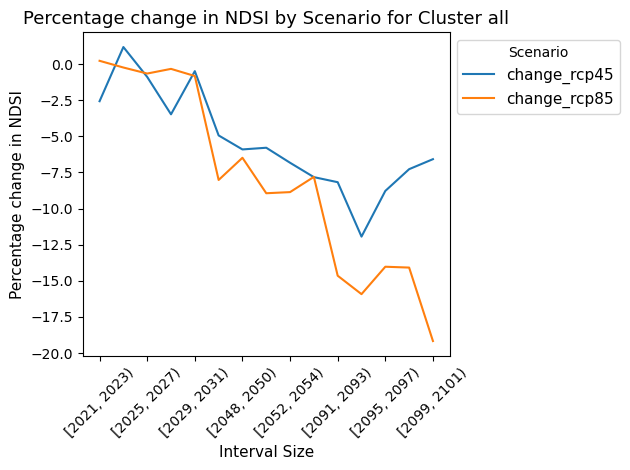

In [575]:
    # for i in range(1):
plot_percentage_change(cluster_name="all")

In [422]:
#creating the dummy_df here
# def create_dummy_df():
future_type = "_far_future"
df = pd.read_csv(f".\ig{future_type}_predictions.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = add_cluster(df)
# Select the first date in the DataFrame using iloc
first_date = df['Date'].iloc[0]

# Create a new DataFrame containing only rows with the first date
dummy_df = df[df['Date'] == first_date].copy()

dummy_df = dummy_df[["Latitude", "Longitude", "cluster"]]
dummy_df.to_csv("./dummy_df.csv" , index=False)
# return dummy_df

In [533]:
future_dictionary

{'': 'Near Future (2021 - 2030)',
 '_mid_future': 'Mid Future (2046-2055)',
 '_far_future': 'Far Future (2091-2100)'}

In [593]:
import matplotlib.colors as mcolors
def plot_spatial_ndsi(df, future_type, scenario):
    # Get unique latitude and longitude values
    latitudes = df['Latitude'].unique()
    longitudes = df['Longitude'].unique()

    # Create a 2D grid of NDSI values
    ndsi_values = df.pivot_table(index='Latitude', columns='Longitude', values='ndsi').values

    # Create a custom colormap from white to red
    cmap = mcolors.LinearSegmentedColormap.from_list("", ["white", "red"])

    # Create a heatmap using imshow with the custom colormap
    plt.figure(figsize=(10, 8))
    plt.imshow(ndsi_values, cmap=cmap, extent=[longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()], origin='lower', vmin=0.15, vmax=0.5)

    # Load and plot the shapefile data
    shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
    shapefile_data.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=0.8)

    plt.title(f'{future_dictionary[future_type]} and Scenario {scenario}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Create a colorbar with custom ticks and labels
    cbar = plt.colorbar(label='NDSI')
    cbar.set_ticks([0.15,  0.3, 0.4, 0.5])  # Customize colorbar ticks
    cbar.set_ticklabels(['0.15', '0.3', '0.4', '0.5'])  # Customize colorbar tick labels

    plt.ylim(min(np.unique(df["Latitude"])), max(np.unique(df["Latitude"])))
    plt.xlim(min(np.unique(df["Longitude"])), max(np.unique(df["Longitude"])))

    # plt.savefig(f'./images/spatial_plot/{future_type}_{scenario}.png', dpi=300)  # Set dpi for better quality if needed
    plt.show()


In [594]:
#making the spatial plot here
future_type = "_far_future"
scenario = "rcp85"
# def plot_spatial_map_change(cluster_name):
# combined_avg_values = pd.DataFrame()
# future_types = ["", "_mid_future", "_far_future"]
# scenario_array = ["rcp26", "rcp45", "rcp85"]

# for future_type in future_types:
    # Assuming your DataFrame is named df
def plot_spatial_map_change(future_type, scenario):
    df = pd.read_csv(f".\ig{future_type}_predictions.csv")
    df_main = pd.read_csv("./dummy_df.csv")
    # Extract year from the 'Date' column
    # df['Year'] = pd.to_datetime(df['Date']).dt.year
    df = add_cluster(df)
    df = cheat_in_the_scenarios(df)
    # df = df[df['cluster'] == cluster_name]

    avg_values = df.groupby('cluster', observed=False).agg({scenario: 'mean'})

    df_main = pd.merge(df_main, avg_values, how='left', left_on='cluster', right_index=True)
    df_main.rename(columns={scenario: 'ndsi'}, inplace=True)

    plot_spatial_ndsi(df_main, future_type, scenario)

for i in future_type_array:
    for j in scenario_array:
        plot_spatial_map_change(i, j)

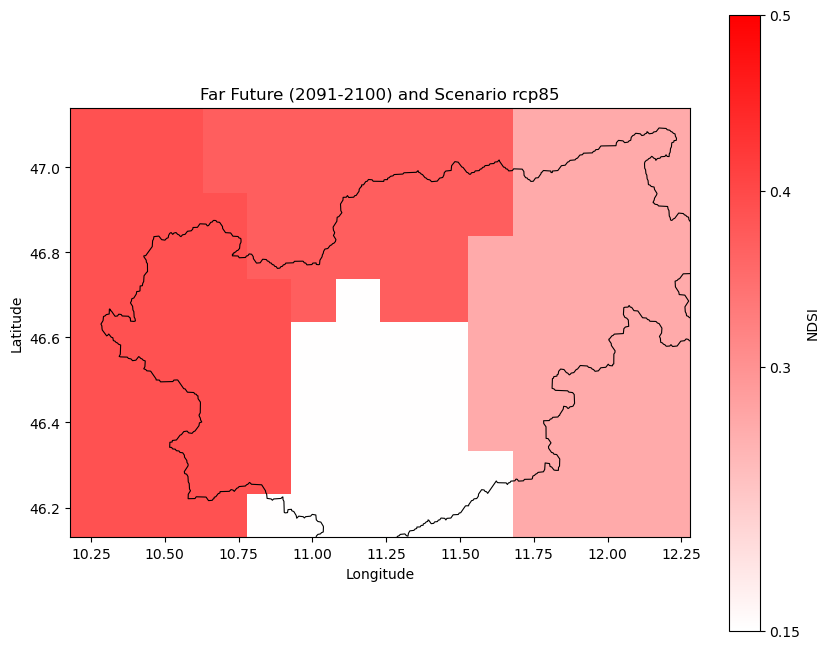

In [595]:
plot_spatial_map_change("_far_future", "rcp85")

In [ ]:

df2 = combined_avg_values.copy()
scenario_array = ["rcp26", "rcp45", "rcp85"]
for scenario in scenario_array:
df2[f'change_{scenario}'] = ((df2[scenario] - df2["rcp26"].iloc[0]) / (df2["rcp26"].iloc[0])) * 100
df2 = df2.drop(scenario_array, axis =1)
df2 = df2.drop("change_rcp26", axis =1)

df2.plot(kind='line')
plt.title(f'Percentage change in NDSI by Scenario for Cluster {cluster_name}', fontsize=13)  # Update the title
plt.xlabel('Interval Size', fontsize = 11)  # Update the xlabel
plt.ylabel('Percentage change in NDSI', fontsize = 11)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Scenario', bbox_to_anchor=(1, 1), loc='upper left', fontsize=11)
plt.tight_layout()
plt.savefig(f'./images/percentage_change_plot/percentage_change_cluster_{cluster_name}.png', dpi=300)  # Set dpi for better quality if needed
plt.show()


In [ ]:
cluster_name = 0
 
future_types = ["", "_mid_future", "_far_future"]
for future_type in future_types:
    # Assuming your DataFrame is named df
    df = pd.read_csv(f".\ig{future_type}_predictions.csv")
    # Extract year from the 'Date' column
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    
    df = add_cluster(df)
    # df = cheat_in_the_scenarios(df)
    
    df = df[df['cluster'] == cluster_name]
    df['Month'] = pd.to_datetime(df['Date']).dt.month

In [ ]:
cluster_name = 1


future_types = ["", "_mid_future", "_far_future"]
combined_avg_values = pd.DataFrame()
# df = pd.read_csv(f"..\complete_df.csv")
df = pd.read_csv(f"./val_vs_predicted.csv")

    # Extract year from the 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = add_cluster(df)
df = df[df['Cluster'] == cluster_name]

min_year = df['Year'].min()
max_year = df['Year'].max()
bins = range(min_year, max_year + 3, 2)

# Cut the years into the custom bins for 2-year intervals
df['Year Group'] = pd.cut(df['Year'], bins=bins, right=False)
df

avg_values = df.groupby('Year Group').agg({'Predicted': 'mean'})
combined_avg_values = pd.concat([combined_avg_values, avg_values], axis=0)

# Plotting the grouped bar graph
combined_avg_values.plot(kind='bar', figsize=(10, 6))
plt.title('Average NDSI Values by Scenario and 2-Year Interval')  # Update the title
plt.xlabel('2-Year Interval')  # Update the xlabel
plt.ylabel('Average NDSI Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Scenario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# plt.show()

In [ ]:
import plotly.express as px

cluster_name = 2
future_type = "_far_future"
scenario_array = ["rcp26", "rcp45", "rcp85"]

df = pd.read_csv(f".\ig{future_type}_predictions.csv")
df = add_cluster(df)
df = df[df['Cluster'] == cluster_name]

df['Date'] = pd.to_datetime(df['Date'])
df['Date'], scale = df['Date'].dt.strftime('%m-%Y'), "Average monthly"
df= df.groupby('Date')[scenario_array].mean().reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

fig = px.line(df, x="Date" , y=scenario_array)
fig.update_layout(title=f'{scale} | {future_dictionary[future_type]} | Cluster {cluster_name}', width = 1800, height = 400)
fig.update_yaxes(title_text='NDSI')

fig.write_image(fr'./images/future_predictions_cluster_{cluster_name}_{future_type}.png')

fig

In [1]:
cluster_name = 3
# future_type = ""
# scenario_array = ["rcp26", "rcp45", "rcp85"]
def plot_val_vs_observed(average="m", cluster_name="all", save=0):
    df = pd.read_csv("./val_vs_predicted.csv")
    if cluster_name != "all":
        df = add_cluster(df)
        df = df[df['cluster'] == cluster_name]

    df['Date'] = pd.to_datetime(df['Date'])
    if average=="m":
    # Average monthly
        df['Date'], scale = df['Date'].dt.strftime(f'%Y-%m',), "Average monthly"
    elif average == "d":
        df['Date'], scale = df['Date'].dt.strftime(f'%Y-%m-%d',), "Average daily"

    df= df.groupby('Date')[["Observed", "Predicted"]].mean().reset_index()
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values(by='Date')

    fig = px.line(df, x="Date" , y=["Predicted","Observed"])
    fig.update_layout(title=f'{scale} | Cluster {cluster_name}' , width = 1800, height = 400)
    fig.update_yaxes(title_text='NDSI')
    if save == 1:
        fig.write_image(fr'./images/avg_{average}_cluster_{cluster_name}.png')
    fig.show()

In [14]:
plot_val_vs_observed("m",1,0)

c:\Users\suvam\miniconda3\envs\tensorflow_env\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [15]:
df = pd.read_csv("./val_vs_predicted.csv")
df

,Unnamed: 0,Date,Latitude,Longitude,Observed,Predicted
0,0,2001-01-01 12:00:00,46.13,10.18,0.625016,0.515510
1,1,2001-01-01 12:00:00,46.13,11.15,0.161397,0.152633
2,2,2001-01-01 12:00:00,46.13,11.31,0.381540,0.273983
3,3,2001-01-01 12:00:00,46.24,11.47,0.522536,0.469483
4,4,2001-01-01 12:00:00,46.24,11.80,0.492909,0.465658
...,...,...,...,...,...,...
55301,55301,2018-12-31 12:00:00,46.35,11.47,0.257227,0.392519
55302,55302,2018-12-31 12:00:00,46.35,11.64,0.326326,0.463980
55303,55303,2018-12-31 12:00:00,46.47,10.99,0.235514,0.227714
55304,55304,2018-12-31 12:00:00,46.69,11.47,0.373548,0.394038


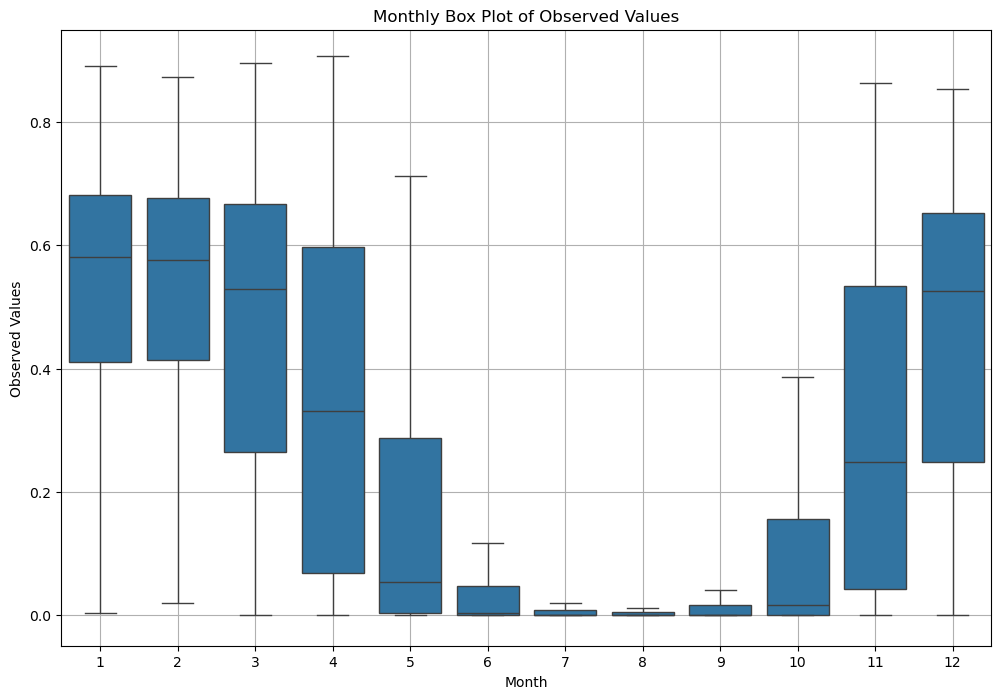

In [39]:
plot_what = "Observed" 
# plot_what =  "Predicted"
#BM2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("./val_vs_predicted.csv")

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Create a box plot using seaborn, which can handle DataFrame box plotting with a grouping variable directly
plt.figure(figsize=(12, 8))  # Set the figure size
sns.boxplot(x='Month', y=plot_what, data=df, showfliers = False)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel(f'{plot_what} Values')
plt.ylim(-0.05,0.95)
plt.title(f'Monthly Box Plot of {plot_what} Values')
plt.grid(True)  # Optional: Adds a grid for easier readability
plt.savefig(f'./images/box_plots/{plot_what}.png', dpi=300)
# Show the plot
plt.show()


In [102]:
def plot_box_monthwise_obs_pred(save):
    # Read the CSV file
    df = pd.read_csv("./val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the month from the 'Date' column
    df['Month'] = df['Date'].dt.month

    # Reshape the dataframe to have 'Observed' and 'Predicted' in the same column
    df_long = pd.melt(df, id_vars=['Month'], value_vars=['Observed', 'Predicted'], var_name='Type', value_name='Value')

    # Create a box plot using seaborn
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='Month', y='Value', hue='Type', data=df_long, showfliers=False)

    # Improve plot aesthetics
    # plt.xticks(rotation=45)
    # x_labels = ax.get_xticklabels()

    # # Customize x-axis labels to show only the first month of each year or specific months
    # new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    # ax.set_xticklabels(new_labels)
    plt.rcParams.update({'font.size': 13}) 
    plt.xlabel('Month')
    plt.ylabel('NDSI')
    plt.title('Monthly Box Plot of Observed and Predicted Values for each Month')
    plt.grid(True)
    if save == 1:
        plt.savefig(f"./images/box_plots/monthwise_observed_vs_predicted.png", dpi=300)
    # Show the plot
    plt.show()


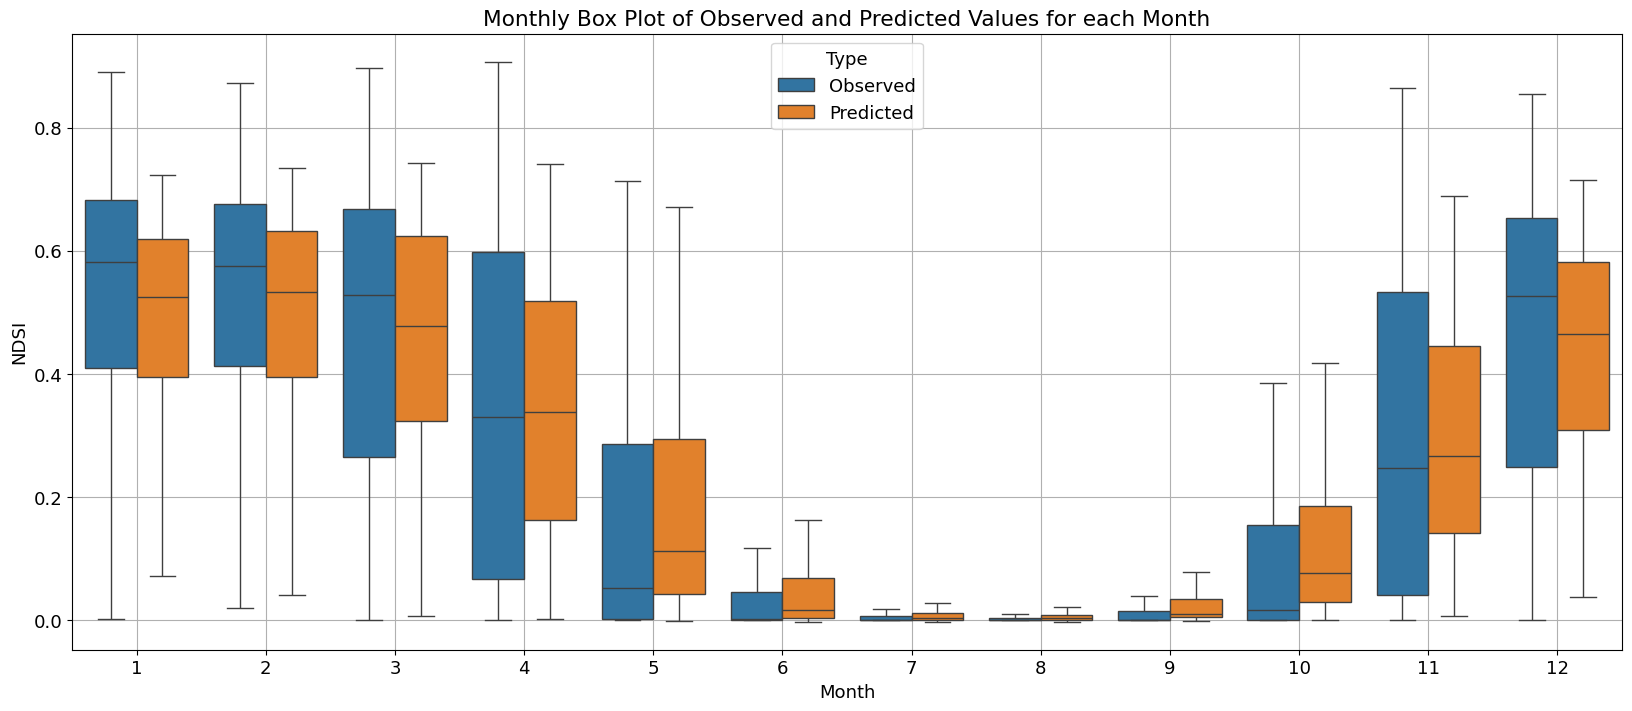

In [103]:
plot_box_monthwise_obs_pred(1)

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_box_yearwise(plot_what, save):
    # Read the CSV file
    df = pd.read_csv("./val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month and create a new column for 'YearMonth'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Create a box plot using seaborn, specifying 'YearMonth' for unique month/year combinations
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='YearMonth', y=plot_what, data=df, showfliers=False)  # Set showfliers to False to hide outliers

    # Set x-axis label rotation and frequency
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    x_labels = ax.get_xticklabels()  # Get all x labels

    # Customize x-axis labels to show only the first month of each year or specific months
    new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    ax.set_xticklabels(new_labels)

    plt.xlabel('Year')
    plt.ylim(-0.05, 0.9)
    plt.ylabel('NDSI')
    plt.title(f'Monthly Box Plot of {plot_what} NDSI Values')
    plt.grid(True)
    if save ==1:
        plt.savefig(f"./images/box_plots/year_wise_{plot_what}", dpi=300)
    # Show the plot
    plt.show()


C:\Users\suvam\AppData\Local\Temp\ipykernel_19424\1809196045.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



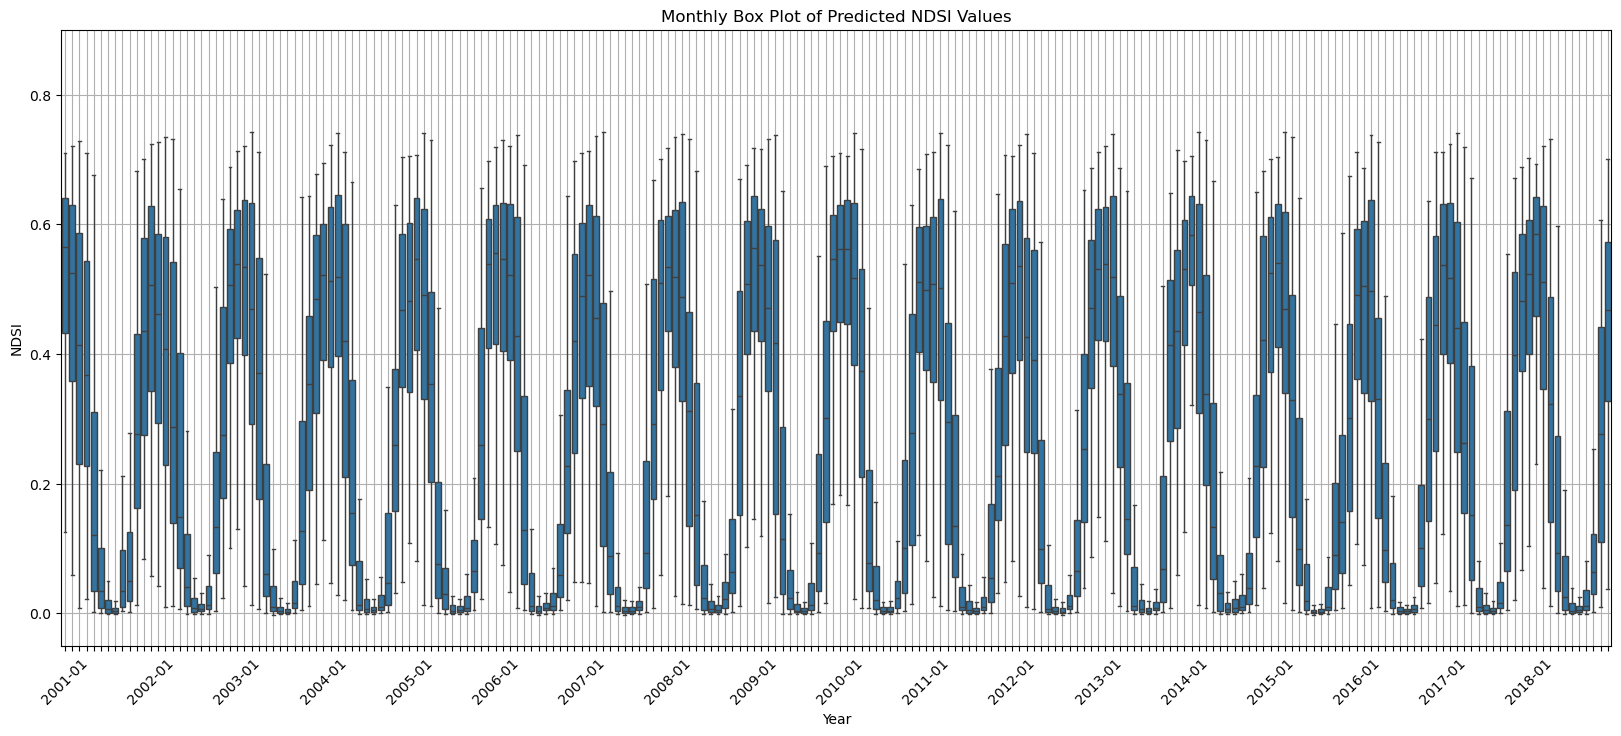

In [63]:
plot_box_yearwise("Predicted", 1)

In [72]:
def plot_box_yearwise_obs_pred(save):
    # Read the CSV file
    df = pd.read_csv("./val_vs_predicted.csv")

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Extract the year and month and create a new column for 'YearMonth'
    df['YearMonth'] = df['Date'].dt.to_period('M')

    # Reshape the dataframe to have 'Observed' and 'Predicted' in the same column
    df_long = pd.melt(df, id_vars=['YearMonth'], value_vars=['Observed', 'Predicted'], var_name='Type', value_name='Value')

    # Create a box plot using seaborn
    plt.figure(figsize=(20, 8))  # Increase the figure size for better visibility
    ax = sns.boxplot(x='YearMonth', y='Value', hue='Type', data=df_long, showfliers=False)

    # Improve plot aesthetics
    plt.xticks(rotation=45)
    x_labels = ax.get_xticklabels()

    # Customize x-axis labels to show only the first month of each year or specific months
    new_labels = [label.get_text() if i % 12 == 0 else '' for i, label in enumerate(x_labels)]  # Show label for the first month of each year
    ax.set_xticklabels(new_labels)

    plt.xlabel('Year-Month')
    plt.ylabel('Value')
    plt.title('Monthly Box Plot of Observed and Predicted Values for Each Year Without Outliers')
    plt.grid(True)
    if save == 1:
        plt.savefig(f"./images/box_plots/observed_vs_predicted_yearwise.png", dpi=300)
    # Show the plot
    plt.show()


C:\Users\suvam\AppData\Local\Temp\ipykernel_19424\3036826446.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

C:\Users\suvam\AppData\Local\Temp\ipykernel_19424\3036826446.py:31: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

c:\Users\suvam\miniconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



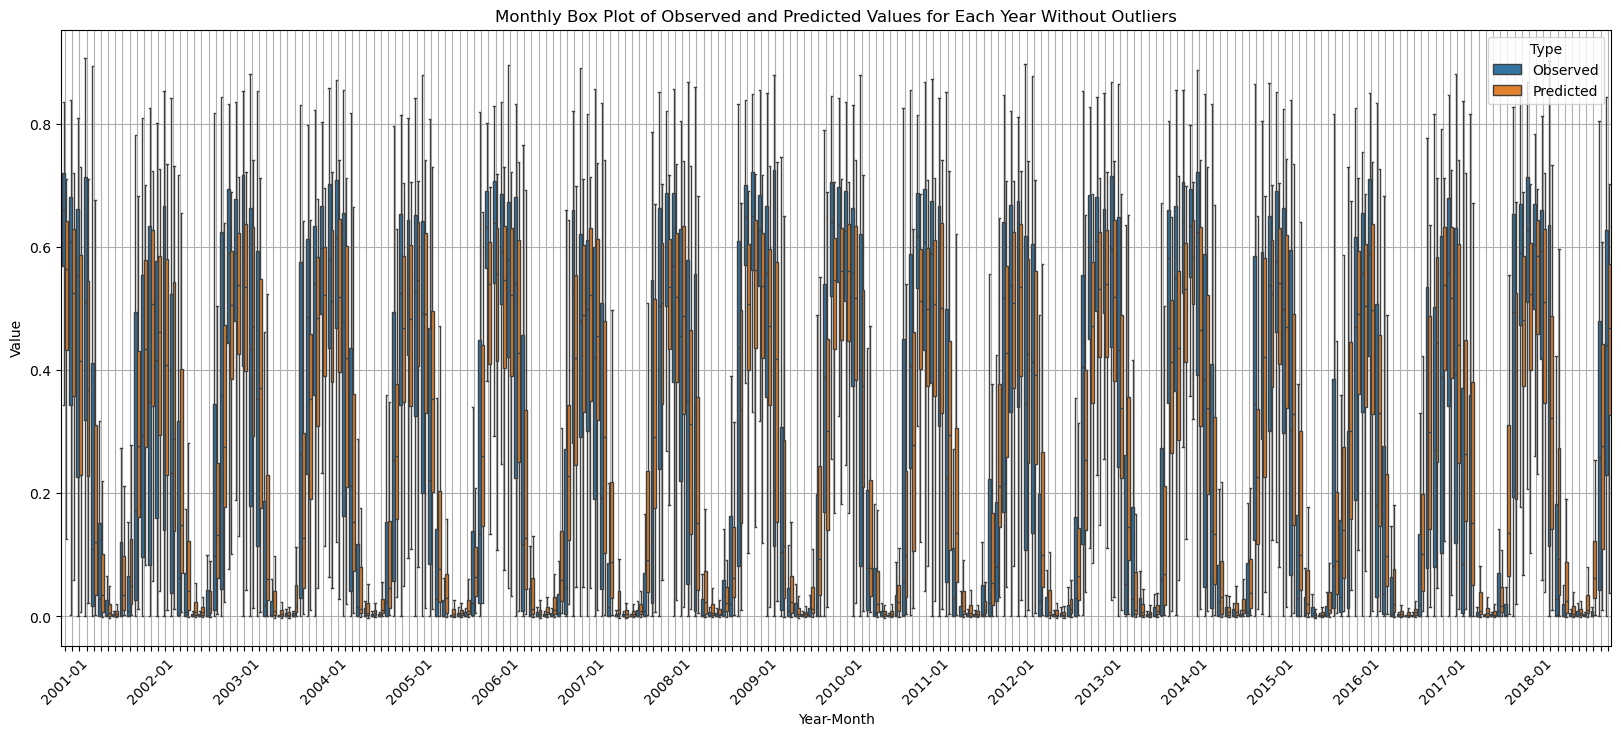

In [73]:
plot_box_yearwise_obs_pred(1)

In [612]:
cluster_name=3
import math
from sklearn.metrics import  mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

df = pd.read_csv("./val_vs_predicted.csv")
df = add_cluster(df)
df = df[df['cluster'] == cluster_name]
df

%run "../functions.ipynb"

y_val = df["Observed"]
y_val_pred = df["Predicted"]

mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
mse_value = mean_squared_error(y_val,y_val_pred)
rmse_value = math.sqrt(mse_value)

pbias_value = pbias(y_val, y_val_pred)

print(f"Cluster {cluster_name}")
print(f'R2 Score: {round(r2,2)}')
print(f"P-bias value: {round(pbias_value,2)}")
print(f"RMSE value: {round(rmse_value,2)}")


Cluster 3
R2 Score: 0.63
P-bias value: -0.56
RMSE value: 0.13


In [572]:
# the cell to get the 

main_df = pd.DataFrame()
cluster_name_array = [0, 1, 2,3]

rolling_df = pd.read_csv("../complete_df.csv")
rolling_df = add_cluster(rolling_df)
    
for cluster_name in cluster_name_array:
    rolling_df2 = rolling_df[rolling_df['cluster'] == cluster_name]
    rolling_df2 = rolling_df2[["ndsi"]]
    
    # Calculate statistics for the current cluster
    stats = rolling_df2.describe()
    stats = stats.rename(columns={'ndsi': f'ndsi_cluster_{cluster_name}'})
    # Append the statistics for the current cluster to main_df
    main_df = pd.concat([main_df, stats], axis=1)

# Display the updated main_df
main_df


,ndsi_cluster_0,ndsi_cluster_1,ndsi_cluster_2,ndsi_cluster_3
count,87798.000000,85639.000000,52133.000000,50960.000000
mean,0.289183,0.411834,0.407778,0.164768
std,0.272374,0.296418,0.288132,0.204248
min,0.000000,0.000000,0.000000,0.000000
25%,0.005336,0.051304,0.060539,0.000519
50%,0.226868,0.513218,0.507423,0.052874
75%,0.557704,0.676617,0.663232,0.310542
max,0.907014,0.925647,0.898996,0.777156


In [ ]:
#bookmark
#Clustering

In [9]:
# Assuming df is your pandas dataframe
df = pd.read_csv(f"..\complete_df.csv")
# Preprocessing
X = df[['Latitude', 'Longitude', 'ndsi']].values

# Clustering
k = 4  # number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Assign Clusters
cluster_labels = kmeans.labels_

# Add cluster labels to the dataframe
df['cluster'] = cluster_labels

# Post-processing (Optional)
cluster_stats = df.groupby('cluster')['ndsi'].mean()  # Example: Mean NDSI value for each cluster
print(cluster_stats)


c:\Users\suvam\miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    0.295481
1    0.426646
2    0.470298
3    0.119480
Name: ndsi, dtype: float64


In [3]:
# bookmark
rolling_df = pd.read_csv("../complete_df.csv")
rolling_df

,Unnamed: 0,Date,Latitude,Longitude,tas,pr,hurs,psl,rsds,sfcWind,...,Latitude_2,Latitude_3,Latitude_4,Longitude_0,Longitude_1,Longitude_2,Longitude_3,Longitude_4,Longitude_5,ndsi
0,0,2001-01-01 12:00:00,46.13,10.18,0.455207,5.962366e-07,0.059927,0.367792,0.193947,0.169951,...,0,0,0,1,0,0,0,0,0,0.625016
1,1,2001-01-01 12:00:00,46.13,10.34,0.536704,7.738499e-06,0.059992,0.362009,0.186955,0.093209,...,0,0,0,1,0,0,0,0,0,0.613114
2,2,2001-01-01 12:00:00,46.13,10.50,0.365140,6.287939e-06,0.047072,0.326892,0.185200,0.135397,...,0,0,0,1,0,0,0,0,0,0.659809
3,3,2001-01-01 12:00:00,46.13,10.66,0.418613,2.962565e-08,0.056350,0.335294,0.187715,0.272633,...,0,0,0,0,1,0,0,0,0,0.680902
4,4,2001-01-01 12:00:00,46.13,10.82,0.500198,7.729422e-05,0.077673,0.368913,0.180417,0.171053,...,0,0,0,0,1,0,0,0,0,0.539262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276525,671371,2018-12-31 12:00:00,46.69,10.34,0.464372,1.102830e-03,0.128888,0.395802,0.190126,0.152666,...,1,0,0,1,0,0,0,0,0,0.509245
276526,671374,2018-12-31 12:00:00,46.69,10.82,0.503497,8.232046e-03,0.136672,0.343628,0.189573,0.251881,...,1,0,0,0,1,0,0,0,0,0.520555
276527,671377,2018-12-31 12:00:00,46.69,11.31,0.542666,2.919564e-03,0.181008,0.383488,0.183271,0.355469,...,1,0,0,0,0,0,1,0,0,0.434647
276528,671378,2018-12-31 12:00:00,46.69,11.47,0.505083,7.022187e-03,0.163211,0.427456,0.165925,0.194620,...,1,0,0,0,0,0,1,0,0,0.373548


In [10]:
temp = {0:0.29, 1:0.43, 2a:0.47, 3:0.12}

In [11]:
temp[1]

0.43

In [14]:
df

,Unnamed: 0,Date,Latitude,Longitude,tas,pr,hurs,psl,rsds,sfcWind,...,Latitude_3,Latitude_4,Longitude_0,Longitude_1,Longitude_2,Longitude_3,Longitude_4,Longitude_5,ndsi,cluster
0,0,2001-01-01 12:00:00,46.13,10.18,0.455207,5.962366e-07,0.059927,0.367792,0.193947,0.169951,...,0,0,1,0,0,0,0,0,0.625016,1
1,1,2001-01-01 12:00:00,46.13,10.34,0.536704,7.738499e-06,0.059992,0.362009,0.186955,0.093209,...,0,0,1,0,0,0,0,0,0.613114,1
2,2,2001-01-01 12:00:00,46.13,10.50,0.365140,6.287939e-06,0.047072,0.326892,0.185200,0.135397,...,0,0,1,0,0,0,0,0,0.659809,1
3,3,2001-01-01 12:00:00,46.13,10.66,0.418613,2.962565e-08,0.056350,0.335294,0.187715,0.272633,...,0,0,0,1,0,0,0,0,0.680902,1
4,4,2001-01-01 12:00:00,46.13,10.82,0.500198,7.729422e-05,0.077673,0.368913,0.180417,0.171053,...,0,0,0,1,0,0,0,0,0.539262,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276525,671371,2018-12-31 12:00:00,46.69,10.34,0.464372,1.102830e-03,0.128888,0.395802,0.190126,0.152666,...,0,0,1,0,0,0,0,0,0.509245,1
276526,671374,2018-12-31 12:00:00,46.69,10.82,0.503497,8.232046e-03,0.136672,0.343628,0.189573,0.251881,...,0,0,0,1,0,0,0,0,0.520555,1
276527,671377,2018-12-31 12:00:00,46.69,11.31,0.542666,2.919564e-03,0.181008,0.383488,0.183271,0.355469,...,0,0,0,0,0,1,0,0,0.434647,2
276528,671378,2018-12-31 12:00:00,46.69,11.47,0.505083,7.022187e-03,0.163211,0.427456,0.165925,0.194620,...,0,0,0,0,0,1,0,0,0.373548,2


In [15]:
plot_clusters(df,"cluster")

NameError: name 'column' is not defined

In [8]:
df_with_clusters = add_cluster(df)
df_with_clusters

NameError: name 'df' is not defined

In [7]:
plot_clusters(df_with_clusters)

NameError: name 'df_with_clusters' is not defined

In [ ]:
def checking_unique_cluster_points(df):
    for i in range(len(np.unique(df['Latitude']))):
        for j in range(len(np.unique(df['Longitude']))):

            check2 =df[["Date","Latitude", "Longitude", "cluster"]]

            check2 = check2[check2['Latitude'] == np.unique(df['Latitude'])[i]]
            check2 = check2[check2['Longitude'] == np.unique(df['Longitude'])[j]]
            print(np.unique(check2.cluster))


In [ ]:
checking_unique_cluster_points(df_with_clusters)

In [ ]:
# lat_long_to_cluster = {}

# # Iterate through the DataFrame
# for index, row in df.iterrows():
#     lat_long_pair = (row['Latitude'], row['Longitude'])
#     cluster = row['cluster']
#     lat_long_to_cluster[lat_long_pair] = cluster

# # Now lat_long_to_cluster contains the mapping of (latitude, longitude) pairs to cluster values
# print(lat_long_to_cluster)

In [ ]:
# Function to map (latitude, longitude) pairs to cluster values
def map_lat_long_to_cluster(row):
    lat_long_pair= {(46.13, 10.18): 1, (46.13, 10.34): 1, (46.13, 10.5): 1, (46.13, 10.66): 1, (46.13, 10.82): 3, (46.13, 10.99): 3, (46.13, 11.15): 3, (46.13, 11.31): 3, (46.13, 11.47): 3, (46.13, 11.64): 3, (46.13, 11.8): 0, (46.13, 11.96): 0, (46.13, 12.12): 0, (46.13, 12.28): 0, (46.24, 10.18): 1, (46.24, 10.34): 1, (46.24, 10.5): 1, (46.24, 10.66): 1, (46.24, 10.82): 1, (46.24, 10.99): 3, (46.24, 11.15): 3, (46.24, 11.31): 3, (46.24, 11.47): 3, (46.24, 11.64): 3, (46.24, 11.8): 0, (46.24, 11.96): 0, (46.24, 12.12): 0, (46.24, 12.28): 0, (46.35, 10.18): 1, (46.35, 10.34): 1, (46.35, 10.5): 1, (46.35, 10.66): 1, (46.35, 10.82): 1, (46.35, 10.99): 3, (46.35, 11.15): 3, (46.35, 11.31): 3, (46.35, 11.47): 3, (46.35, 11.64): 0, (46.35, 11.8): 0, (46.35, 11.96): 0, (46.35, 12.12): 0, (46.35, 12.28): 0, (46.47, 10.18): 1, (46.47, 10.34): 1, (46.47, 10.5): 1, (46.47, 10.66): 1, (46.47, 10.82): 1, (46.47, 10.99): 3, (46.47, 11.15): 3, (46.47, 11.31): 3, (46.47, 11.47): 3, (46.47, 11.64): 0, (46.47, 11.8): 0, (46.47, 11.96): 0, (46.47, 12.12): 0, (46.47, 12.28): 0, (46.58, 10.18): 1, (46.58, 10.34): 1, (46.58, 10.5): 1, (46.58, 10.66): 1, (46.58, 10.82): 1, (46.58, 10.99): 3, (46.58, 11.15): 3, (46.58, 11.31): 3, (46.58, 11.47): 3, (46.58, 11.64): 0, (46.58, 11.8): 0, (46.58, 11.96): 0, (46.58, 12.12): 0, (46.58, 12.28): 0, (46.69, 10.18): 1, (46.69, 10.34): 1, (46.69, 10.5): 1, (46.69, 10.66): 1, (46.69, 10.82): 1, (46.69, 10.99): 2, (46.69, 11.15): 3, (46.69, 11.31): 2, (46.69, 11.47): 2, (46.69, 11.64): 0, (46.69, 12.12): 0, (46.69, 12.28): 0, (46.8, 10.18): 1, (46.8, 10.34): 1, (46.8, 10.5): 1, (46.8, 10.66): 1, (46.8, 10.82): 2, (46.8, 10.99): 2, (46.8, 11.15): 2, (46.8, 11.31): 2, (46.8, 11.47): 2, (46.8, 11.64): 0, (46.8, 12.12): 0, (46.8, 12.28): 0, (46.92, 10.18): 1, (46.92, 10.34): 1, (46.92, 10.5): 1, (46.92, 10.66): 1, (46.92, 10.82): 2, (46.92, 10.99): 2, (46.92, 11.15): 2, (46.92, 11.31): 2, (46.92, 11.47): 2, (46.92, 11.64): 2, (46.92, 12.12): 0, (46.92, 12.28): 0, (47.03, 10.18): 1, (47.03, 10.34): 1, (47.03, 10.5): 1, (47.03, 10.66): 2, (47.03, 10.82): 2, (47.03, 10.99): 2, (47.03, 11.15): 2, (47.03, 11.31): 2, (47.03, 11.47): 2, (47.03, 11.64): 2, (47.03, 12.12): 0, (47.03, 12.28): 0, (47.14, 10.18): 1, (47.14, 10.34): 1, (47.14, 10.5): 1, (47.14, 10.66): 2, (47.14, 10.82): 2, (47.14, 10.99): 2, (47.14, 11.15): 2, (47.14, 11.31): 2, (47.14, 11.47): 2, (47.14, 11.64): 2, (47.14, 11.8): 0, (47.14, 11.96): 0, (47.14, 12.12): 0, (47.14, 12.28): 0, (46.92, 11.96): 0, (46.69, 11.8): 0, (46.69, 11.96): 0, (46.8, 11.8): 0, (46.8, 11.96): 0, (46.92, 11.8): 0, (47.03, 11.8): 0, (47.03, 11.96): 0}
    
    lat_long_pair = (row['Latitude'], row['Longitude'])
    return lat_long_to_cluster.get(lat_long_pair, None)

df['cluster'] = df.apply(lambda row: map_lat_long_to_cluster(row), axis=1)


In [ ]:
check2 =df[["Date","Latitude", "Longitude", "cluster"]]
check = df[["Date","Latitude", "Longitude"]]

i = 5
j = 9

In [ ]:
checking_unique_cluster_points(df)

In [ ]:


check['cluster'] = check.apply(lambda row: map_lat_long_to_cluster(row), axis=1)

check = check[check['Latitude'] == np.unique(df['Latitude'])[i]]
check = check[check['Longitude'] == np.unique(df['Longitude'])[j]]
np.unique(check.cluster)

In [ ]:
def plot_clusters(df):
    #bookmark

    # Plot clusters with larger scatter dots
    scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='.', s=1000) # Adjust the 's' parameter to increase the size of dots

    shapefile_data = gpd.read_file(r'C:\Users\suvam\AiE stuff\thesis\adigeshp\Export_Output2.shp')
    shapefile_data = shapefile_data.cx[:, :46.0]
    shapefile_data.plot(ax=plt.gca(), alpha=0.5, color="black")
    # Add legend
    legend = plt.legend(*scatter.legend_elements(), title='Clusters',  bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('Clustered Points')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.ylim(min(np.unique(df["Latitude"])-0.12), max(np.unique(df["Latitude"])+0.12))
    plt.show()


In [ ]:
xx(check2)

In [ ]:
df = pd.read_csv("./ig_far_future_predictions.csv")
df['cluster'] = cluster_labels

In [ ]:
# Plot clusters
scatter = plt.scatter(df['Longitude'], df['Latitude'], c=df['cluster'], cmap='viridis', marker='.')

# Add legend
legend = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.title('Clustered Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
lat = np.unique(df.Latitude)
lat

In [ ]:
lon = np.unique(df.Longitude)
lon

In [ ]:

check = df[df["Latitude"] == lat[2]]
check = check[check["Longitude"] == lon[7]]


print(np.unique(check.cluster))
check